In [44]:
%matplotlib inline
import pandas as pd
import numpy as np

In [ ]:
essays = pd.read_csv('opendata_essays.csv', index_col=None,error_bad_lines = False)
essays.tail()

In [6]:
projects = pd.DataFrame.from_csv('opendata_projects.csv', index_col=None)

In [7]:
projects.tail()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
878847,b4f2f1d5cab6f64a84f7df2772bf4fbc,9ee8356813d1fd88d1157d34c517e77b,ef1c6eaec7195658a1b026d1e478c16b,2.309930e+11,43.650808,-70.267217,Portland,ME,4102,urban,...,25,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-10 00:00:00
878848,b84d6bc2819ed03aff8aa91d206a7313,9d077d48f161fe16ca5a4d9df1c13b95,45b36be80716e7d63ac79f3380a5c80d,NaN,47.232365,-122.413094,Tacoma,WA,98404,urban,...,200,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-02 00:00:00
878849,bf869faa26b69a8edbfac542daa3fd6b,eae4fe2af677acfc5cfbd2be8e401c9e,57e9efd125504e5e110fa54cb0181a90,1.300120e+11,33.782326,-84.362785,Atlanta,GA,30306,urban,...,120,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-10 00:00:00
878850,d5bc40d23916919df6673977cbfd4579,40eba7b869412b001ea603009ef9afda,7d23b9c47d4b01c33e59617d6cc2221c,NaN,33.032644,-80.237674,Summerville,SC,29483,NaN,...,54,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-10-16 00:00:00
878851,de374459245ace7b1d4112f6ec741081,ef44b81f8c99ff27faa74f1d6589bb15,85075c29b09f3a6723083b4ee962a57a,2.912010e+11,38.752922,-90.313082,Ferguson,MO,63135,suburban,...,25,0,0,f,f,live,2015-08-18 00:00:00,NaN,NaN,2015-12-10 00:00:00


In [8]:
len(projects)

878852

In [114]:
area = len(projects['primary_focus_area'].drop_duplicates())
subject = len(projects['primary_focus_subject'].drop_duplicates())
area,subject

(8, 29)

In [162]:
#1) Plot between Category and Status
p = projects[projects.funding_status != 'live'] # Considering only completed projects
p.loc[:,'date_completed'] = pd.to_datetime(p['date_completed'])
p.loc[:,'date_posted'] = pd.to_datetime(p['date_posted'])
p1 = p.groupby(by='primary_focus_subject')
p2 = p[p.funding_status == 'completed']
p2.loc[:,'project_duration'] = p2['date_completed'] - p2['date_posted']
p2.loc[:,'project_duration_days'] = p2['project_duration'].astype('timedelta64[D]')
p2 = p2.groupby(by='primary_focus_subject')
a = 100*p2.size()/p1.size()
b = p2['project_duration_days'].mean()

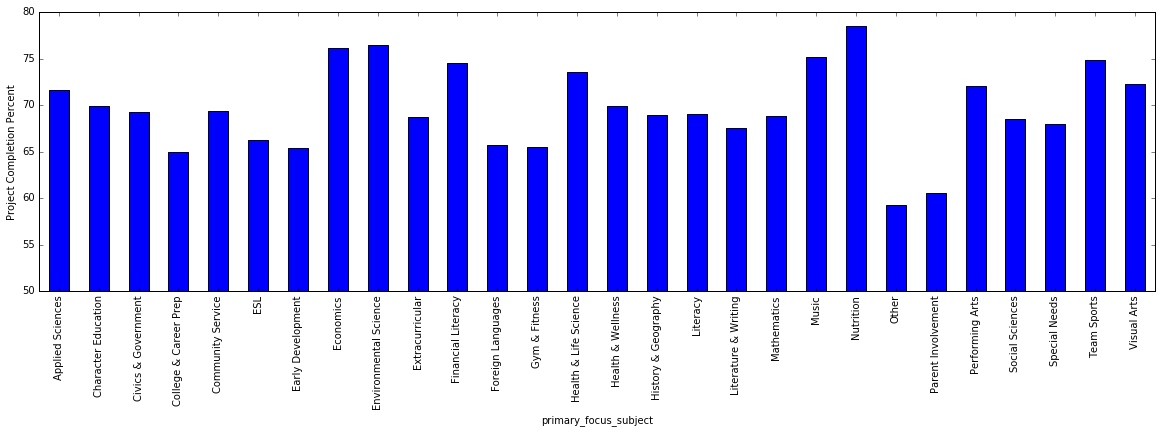

In [178]:
ax = a.plot(kind='bar',figsize=(20,5), ylim=(50,80))
ax.set_ylabel("Project Completion Percent")

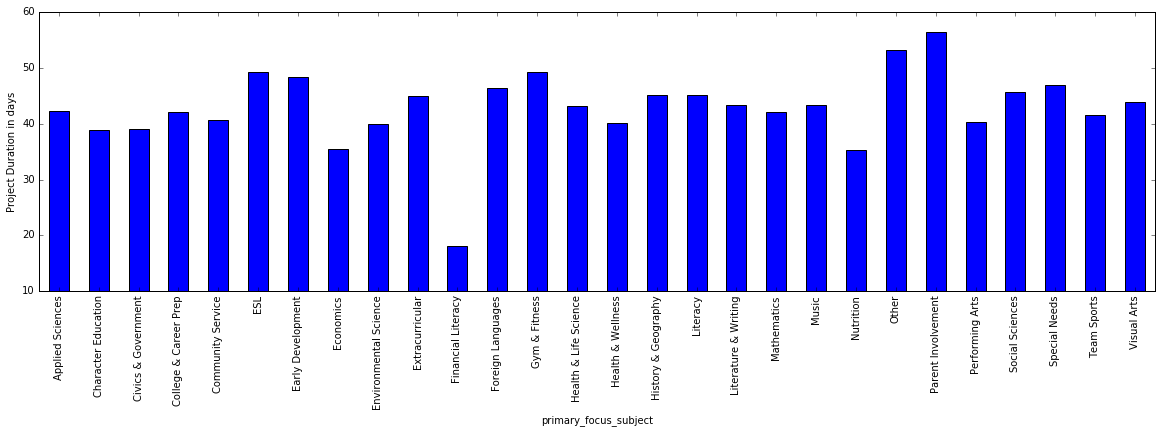

In [177]:
bx = b.plot(kind='bar',figsize=(20,5), ylim=(10,60))
bx.set_ylabel("Project Duration in days")

In [203]:
#x = pd.DataFrame(a).join(pd.DataFrame(b))
#x.plot(kind='bar',figsize=(20,5))

In [173]:
# Low performing Subjects
a[a<a.mean()].sort_values()

primary_focus_subject
Other                    59.298572
Parent Involvement       60.560345
College & Career Prep    64.934310
Early Development        65.371201
Gym & Fitness            65.509468
Foreign Languages        65.674751
ESL                      66.265746
Literature & Writing     67.505848
Special Needs            67.922112
Social Sciences          68.498693
Extracurricular          68.764691
Mathematics              68.853357
History & Geography      68.977074
Literacy                 68.995732
Civics & Government      69.269681
Community Service        69.360269
dtype: float64

In [174]:
# Top performing Subjects
a[a>a.mean()].sort_values(ascending=False)

primary_focus_subject
Nutrition                78.501873
Environmental Science    76.504693
Economics                76.176948
Music                    75.180386
Team Sports              74.870197
Financial Literacy       74.482007
Health & Life Science    73.585030
Visual Arts              72.309117
Performing Arts          72.068118
Applied Sciences         71.589055
Health & Wellness        69.925975
Character Education      69.884815
dtype: float64

1) 'Other' subject under Applied learning scored the lowest<br>
2) 'Maths' under Math&Science scored below average. All other science scored high with Envrionmental Science being the highest<br>
3) 'Nutrition' scored the highest<br>
4) Parent involvement also scored very low<br>
5) Economics,Music and Sports scored high<br>
6) Financial literacy was funded the fastest and Other the slowest

In [205]:
# 2) Plot between poverty level and status
p = projects[projects.funding_status != 'live']
p1 = p.groupby(by='poverty_level')
print 'Number of poverty levels: ',len(p1)
p2 = p[p.funding_status == 'completed']
p2 = p2.groupby(by='poverty_level')
a = 100*p2.size()/p1.size()
b = p1['total_donations'].mean()

Number of poverty levels:  4


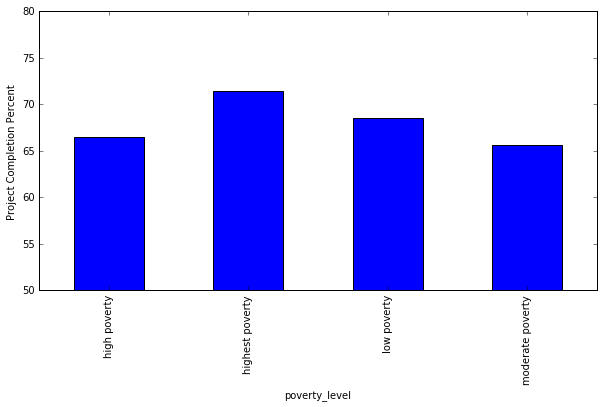

In [208]:
ax = a.plot(kind='bar',figsize=(10,5),ylim=(50,80))
ax.set_ylabel("Project Completion Percent")

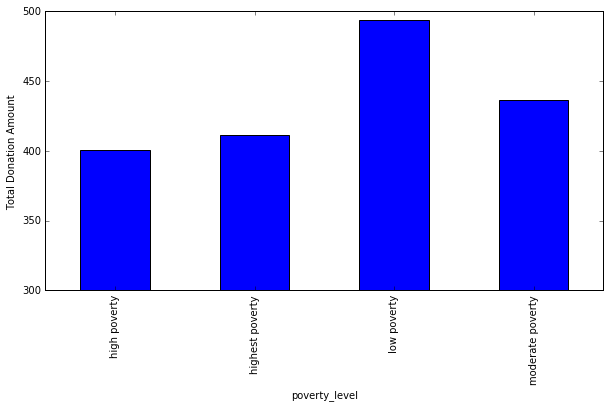

In [209]:
bx = b.plot(kind='bar',figsize=(10,5),ylim=(300,500))
bx.set_ylabel("Total Donation Amount")